# McClellan Oscillator

https://stockcharts.com/school/doku.php?id=chart_school:market_indicators:mcclellan_oscillator

Market Indicator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'tsla'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
dfs = yf.download(symbol,start,end)

# View Columns
dfs.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [3]:
import talib as ta

https://en.wikipedia.org/wiki/Advance%E2%80%93decline_line

https://www.investopedia.com/terms/m/mcclellanoscillator.asp

In [4]:
change = dfs['Adj Close'].diff()
Advances = change[change > 0]  
Declines = change[change <= 0]

In [5]:
# df[['Advances', 'Declines']] = df[['Advances', 'Declines']].fillna(0)
# df['ADL'] = df['Advances'].fillna(df['Declines'])
# ADL for stocks
dfs['ADL_Stock'] = Advances.combine_first(Declines)

In [6]:
dfs.head()

,Open,High,Low,Close,Adj Close,Volume,ADL_Stock
Date,,,,,,,
2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,NaN
2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.850000
2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.568666
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,1.167999
2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,1.538668


https://stockcharts.com/school/doku.php?id=chart_school:market_indicators:mcclellan_oscillator

In [7]:
import quandl as q

Advances = q.get('URC/NYSE_ADV', start_date = "2020-01-01")['Numbers of Stocks']
Declines = q.get('URC/NYSE_DEC', start_date = "2020-01-01")['Numbers of Stocks'] 

In [8]:
df = pd.DataFrame()
df['Advances'] = Advances
df['Declines'] = Declines
df.head()

,Advances,Declines
Date,,
2020-01-02,1808.0,1147.0
2020-01-03,1387.0,1543.0
2020-01-06,1557.0,1347.0
2020-01-07,1290.0,1652.0
2020-01-08,1744.0,1197.0


In [9]:
#Ratio Adjusted Net Advances (RANA): (Advances - Declines)/(Advances + Declines)  
#RANA = (advances - declines) / (advances + declines)  
# df['Net_Advances'] = df['Advances'] - df['Declines']
# df['Ratio_Adjusted'] = (df['Net_Advances']/(df['Advances'] + df['Declines']))*1000
df['Net_Advances'] = df['Advances'] - df['Declines'] 
df['Ratio_Adjusted'] = (df['Net_Advances']/(df['Advances'] + df['Declines'])) * 1000
df['19_EMA'] = ta.EMA(df['Ratio_Adjusted'], timeperiod=19)
df['39_EMA'] = ta.EMA(df['Ratio_Adjusted'], timeperiod=39)
df['RANA'] = (df['Advances'] - df['Declines']) / (df['Advances'] + df['Declines']) * 1000

In [10]:
df.tail(20)

,Advances,Declines,Net_Advances,Ratio_Adjusted,19_EMA,39_EMA,RANA
Date,,,,,,,
2020-01-20,1480.0,1431.0,49.0,16.832704,NaN,NaN,16.832704
2020-01-21,1160.0,1788.0,-628.0,-213.025780,NaN,NaN,-213.025780
2020-01-22,1452.0,1458.0,-6.0,-2.061856,NaN,NaN,-2.061856
2020-01-23,1459.0,1425.0,34.0,11.789182,NaN,NaN,11.789182
2020-01-24,848.0,2081.0,-1233.0,-420.962786,NaN,NaN,-420.962786
2020-01-27,620.0,2331.0,-1711.0,-579.803456,NaN,NaN,-579.803456
2020-01-28,2018.0,891.0,1127.0,387.418357,34.270516,NaN,387.418357
2020-01-29,1463.0,1453.0,10.0,3.429355,31.186400,NaN,3.429355
2020-01-30,1514.0,1385.0,129.0,44.498103,32.517571,NaN,44.498103


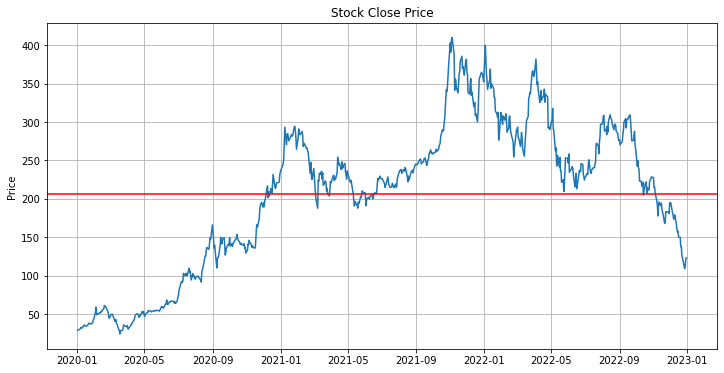

In [11]:
plt.figure(figsize=(12,6))
plt.plot(dfs.index, dfs['Adj Close'])
plt.axhline(y=dfs['Adj Close'].mean(),color='r')
plt.title('Stock Close Price')
plt.grid()
plt.ylabel('Price')
plt.show()

## Comparing Stock and McClellan Oscillator

Text(0.5, 0, 'Date')

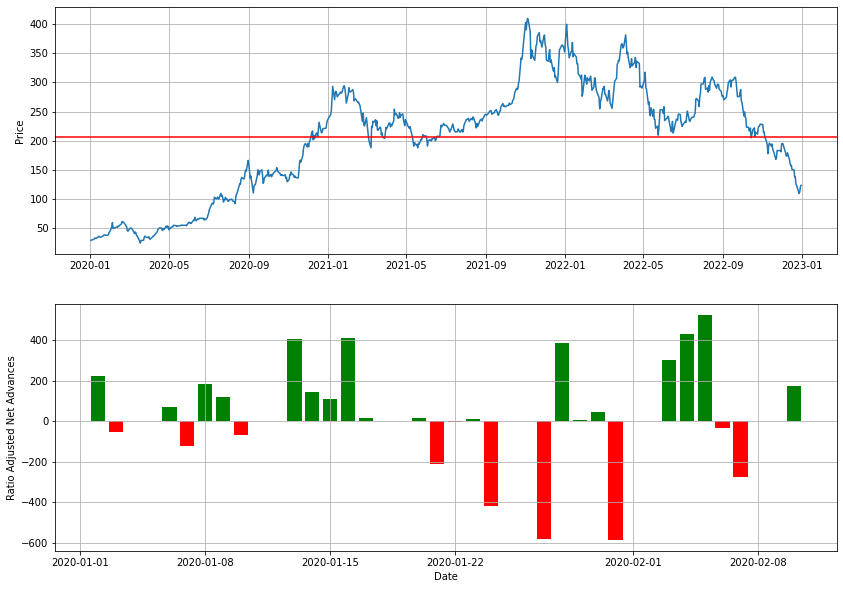

In [12]:
# Line Chart
# See if the stock correlate with Market Indicator
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(dfs.index, dfs['Adj Close'])
ax1.axhline(y=dfs['Adj Close'].mean(),color='r')
ax1.grid()
ax1.set_ylabel('Price')

df['Positive'] = df['RANA'] > 0
ax2 = plt.subplot(2, 1, 2)
ax2.bar(df.index, df['RANA'], color=df.Positive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('Ratio Adjusted Net Advances')
ax2.set_xlabel('Date')

## NYSE Advance and Declines

Text(0.5, 0, 'Date')

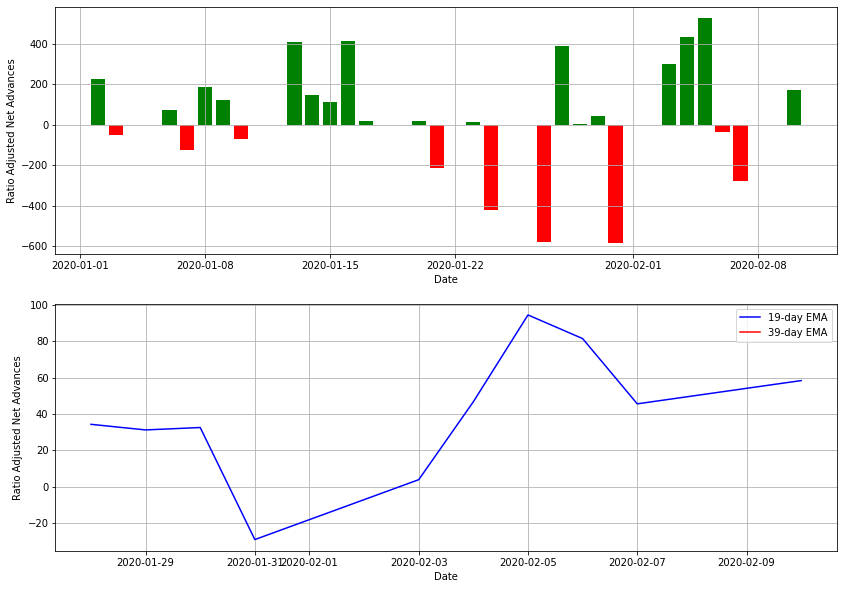

In [13]:
fig = plt.figure(figsize=(14,10))
df['Positive'] = df['RANA'] > 0
ax = plt.subplot(2, 1, 1)
ax.bar(df.index, df['RANA'], color=df.Positive.map({True: 'g', False: 'r'}))
ax.grid()
ax.set_ylabel('Ratio Adjusted Net Advances')
ax.set_xlabel('Date')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index, df['19_EMA'], color='b', label='19-day EMA')
ax2.plot(df.index, df['39_EMA'], color='r', label='39-day EMA')
ax2.grid()
ax2.set_ylabel('Ratio Adjusted Net Advances')
ax2.legend(loc='best')
ax2.set_xlabel('Date')